# Heisenberg Model Simulation using Trotterization

In [5]:
import json
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

from functools import partial

In [2]:
dev = qml.device("default.qubit", wires=4)

# Hamiltonian for a Heisenberg chain with 4 spins
def create_hamiltonian(params):
    couplings = [-params[-1]]
    ops = [qml.PauliX(3)]
    for i in range(3):
        couplings = [-params[-1]] + couplings
        ops = [qml.PauliX(i)] + ops        
    for i in range(4):
        couplings = [-params[-2]] + couplings
        ops = [qml.PauliZ(i)@qml.PauliZ((i+1)%4)] + ops
    for i in range(4):
        couplings = [-params[-3]] + couplings
        ops = [qml.PauliY(i)@qml.PauliY((i+1)%4)] + ops
    for i in range(4):
        couplings = [-params[0]] + couplings
        ops = [qml.PauliX(i)@qml.PauliX((i+1)%4)] + ops    
    return qml.Hamiltonian(couplings,ops)

# Circuit for the time evolution of the Heisenberg chain
@partial(qml.transforms.decompose, gate_set={qml.CNOT, qml.RX, qml.RY, qml.RZ})
@qml.qnode(dev)
def evolve(params, time, depth):
    qml.ApproxTimeEvolution(create_hamiltonian(params), time, depth)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2) @ qml.PauliZ(3))

In [3]:
print(create_hamiltonian([1,3,2,0.3]))

-1 * (X(3) @ X(0)) + -1 * (X(2) @ X(3)) + -1 * (X(1) @ X(2)) + -1 * (X(0) @ X(1)) + -3 * (Y(3) @ Y(0)) + -3 * (Y(2) @ Y(3)) + -3 * (Y(1) @ Y(2)) + -3 * (Y(0) @ Y(1)) + -2 * (Z(3) @ Z(0)) + -2 * (Z(2) @ Z(3)) + -2 * (Z(1) @ Z(2)) + -2 * (Z(0) @ Z(1)) + -0.3 * X(2) + -0.3 * X(1) + -0.3 * X(0) + -0.3 * X(3)


In [4]:
print(qml.draw(evolve)([1,3,2,0.3], 3, 2))

0: ──RZ(1.57)──RX(1.57)──RZ(1.57)─╭●────────────╭●──RZ(1.57)──RX(1.57)──RZ(1.57)──RZ(1.57)──RX(1.57)
1: ───────────────────────────────│─────────────│───RZ(1.57)──RX(1.57)──RZ(1.57)────────────────────
2: ───────────────────────────────│─────────────│───RZ(1.57)──RX(1.57)──RZ(1.57)────────────────────
3: ──RZ(1.57)──RX(1.57)──RZ(1.57)─╰X──RZ(-3.00)─╰X──RZ(1.57)──RX(1.57)──RZ(1.57)──RZ(1.57)──RX(1.57)

───RZ(1.57)────────────────────────────────────────────────────────────────────────────────
─────────────────────────────────────────────────────────────────────────────────────────╭X
────────────╭X──RZ(-3.00)─╭X──RZ(1.57)──RX(1.57)──RZ(1.57)──RZ(1.57)──RX(1.57)──RZ(1.57)─╰●
───RZ(1.57)─╰●────────────╰●──RZ(1.57)──RX(1.57)──RZ(1.57)──RX(1.57)───────────────────────

────────────────────────────────────────────────────────────────────────────╭X──RZ(-3.00)─╭X
───RZ(-3.00)─╭X──RZ(1.57)──RX(1.57)──RZ(1.57)──RZ(1.57)──RX(1.57)──RZ(1.57)─╰●────────────╰●
─────────────╰●──RZ(1.57)──RX(1.57)──RZ(

In [6]:
result = (evolve)([1,3,2,0.3], 3, 2)
print(result)

0.008660043937568938


In [9]:
## Time evolution of the Heisenberg chain using Trotterization

# parameters to be changed
time = range(0, 20, 1)
depth = 3
params = [1,3,2,0.3]
results = []

for t in time:
    results.append(evolve(params, t, depth))

print("Results:", results)

Results: [np.float64(1.0000000000000004), np.float64(0.9018015582223227), np.float64(0.5563391040240881), np.float64(0.8451972493555686), np.float64(0.5370960785298144), np.float64(0.960544496648104), np.float64(-0.11878554103363109), np.float64(0.0041563632563966155), np.float64(-0.00665003872622405), np.float64(0.3222238424045889), np.float64(0.8289779457169366), np.float64(0.5659366467014615), np.float64(0.46967146317046077), np.float64(0.8583301579440811), np.float64(0.0912251558803127), np.float64(0.9099187553917638), np.float64(0.9766207066212498), np.float64(0.7135258125062409), np.float64(0.42818632257965566), np.float64(0.07415757363588946)]


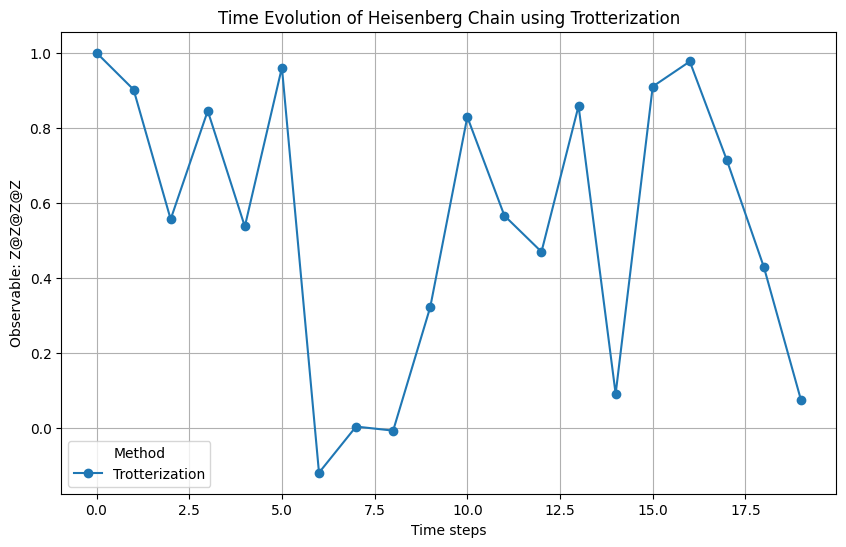

In [10]:
## Plotting the results

plt.plot
plt.figure(figsize=(10, 6))
plt.plot(time, results, marker='o', label="Trotterization")
plt.title("Time Evolution of Heisenberg Chain using Trotterization")
plt.xlabel("Time steps")
plt.ylabel("Observable: Z@Z@Z@Z")
plt.legend(title="Method")
plt.grid(True)
plt.show()